# Task 5: K-Nearest neighbors Classification


#### 1.importing the dataset and Preprocessing

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [106]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
data=data.drop(columns=['Id'])

In [108]:
#Encoding the Features
from sklearn.preprocessing import LabelEncoder


In [109]:
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

In [110]:
print("\nEncoding mapping:")
for i, species in enumerate(le.classes_):
    print(f"{species}: {i}")



Encoding mapping:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2


In [111]:
X=data.drop('Species',axis=1)
y=data['Species']

In [112]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### 2.Training the KNN model

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [115]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

#### 3.Experimenting with different K values

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
# Experiment with different K values
k_values = range(1, 31)
train_acc = []
test_acc = []
cv_acc = []

In [118]:
for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, knn.predict(X_train)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test)))
    

In [119]:
optimal_k_test = k_values[np.argmax(test_acc)]
print(f"optimized k Value: {optimal_k_test}")

optimized k Value: 3


#### 4.Evaluating model using accuracy,confusion matrix

In [120]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [121]:
knn = KNeighborsClassifier(n_neighbors=optimal_k_test)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [122]:
y_pred = knn.predict(X_test)

In [123]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Number of Correct Predictions: {accuracy_score(y_test, y_pred, normalize=False)}/{len(y_test)}")

Model Accuracy: 1.0000
Number of Correct Predictions: 45.0/45


In [124]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


#### 5.Visualizing Decision boundary

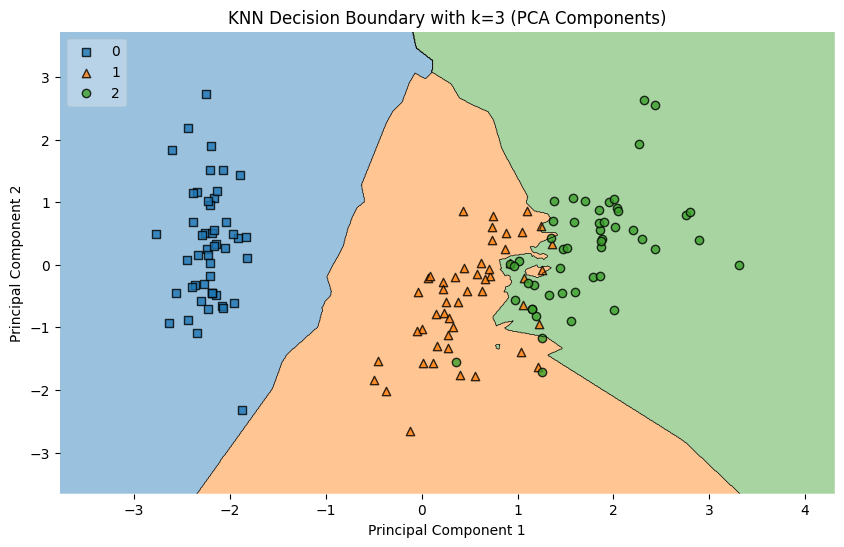

In [127]:
#Visualizing Decision boundary with pca
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k_test)
knn_pca.fit(X_pca, y)
plt.figure(figsize=(10, 6))
plot_decision_regions(X_pca, y.values, clf=knn_pca, legend=2)
plt.title(f"KNN Decision Boundary with k={optimal_k_test} (PCA Components)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()